In [1]:
from platform import python_version
python_version()

'3.10.4'

In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [16]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf

import data_transformer as dataTransformer
from Utils_Python.database_connector.DatabaseConnector import DatabaseConnector
from Utils_Python.file_writer.FileWriter import FileWriter
from Utils_Python.file_reader.FileReader import FileReader

In [6]:
POINT_IN_A_DAY = 96
ADJUSTER = 2.103
ROW_COUNT = (POINT_IN_A_DAY * 5 * 2) * ADJUSTER  # (Points in 1 day * Number of Days * Number of Weeks) * n
DATABASE_NAME = 'IG_TRADING'
SCHEMA_NAME = 'FOREX_MINI'
TABLE_NAME = 'GBPUSD_15MIN'
DATA_PATH = '/ScalpFX/src/data'
MODEL_PATH = '/ScalpFX/src/model'


RANDOM_SEED = 42

In [7]:
TMP_DATA_PATH = '/ScalpFX/src/data/tmp_df.pkl'
TMP_DF_PATH = '/ScalpFX/src/data/tmp_df.pkl'
TMP_TRANS_PATH = '/ScalpFX/src/data/tmp_trans.pkl'
TMP_NORM_PATH = '/ScalpFX/src/data/tmp_norm.pkl'
TMP_PREP_PATH = '/ScalpFX/src/data/tmp_prep.json'

In [8]:
def closeDatabaseConnection(databaseConnector, cur, connObject):
    cur.close()
    databaseConnector.closeConnection(connObject)

In [9]:
# def getTrainingData(filePathToWrite, connTag, verbose=False):
filePathToWrite = TMP_DATA_PATH
connTag = "PostgresqlIgTrading"
verbose = False

databaseConnector = DatabaseConnector()
connObject = databaseConnector.openConnection(connTag)
conn = connObject['connection']
cur = conn.cursor()

query = (   
            f"SELECT * "
            f"FROM \"{DATABASE_NAME}\".\"{SCHEMA_NAME}\".\"{TABLE_NAME}\" "
            f"ORDER BY datetime DESC "
            f"LIMIT {ROW_COUNT}"
        )

colNames = None
try:
    cur.execute(query)
    colNames = [desc[0] for desc in cur.description]
except Exception as e:
    closeDatabaseConnection(databaseConnector, cur, connObject)
    raise Exception(f"Could not execute: {query}\n{e}")

res = cur.fetchall()    
closeDatabaseConnection(databaseConnector, cur, connObject)

df = pd.DataFrame(res, columns=colNames)
df = df.sort_values(['datetime'], ascending=True).reset_index()
df = df.drop(['index'], axis = 1)

if verbose:
    print('getTrainingData()')
    print(f"{df}\n")

df.to_pickle(filePathToWrite)
print(f"Training Data has been saved to '{filePathToWrite}'\n")


df

Successfully connect to 'PostgresqlIgTrading' database, with connection ID 'PostgresqlIgTrading_MEcADUoZ'!
Successfully close the 'PostgresqlIgTrading_MEcADUoZ' connection!
Training Data has been saved to '/ScalpFX/src/data/tmp_df.pkl'



,datetime,open,high,low,close,volume,inserted_on_myt
0,2022-06-03 08:00:00,1.25784,1.25786,1.25711,1.25740,1430,NaT
1,2022-06-03 08:15:00,1.25740,1.25819,1.25720,1.25819,1270,NaT
2,2022-06-03 08:30:00,1.25820,1.25901,1.25785,1.25838,1962,NaT
3,2022-06-03 08:45:00,1.25837,1.25839,1.25766,1.25787,1742,NaT
4,2022-06-03 09:00:00,1.25788,1.25837,1.25759,1.25787,1446,NaT
...,...,...,...,...,...,...,...
2014,2022-07-02 03:45:00,1.20986,1.20999,1.20911,1.20965,1516,2022-07-02 11:08:58
2015,2022-07-02 04:00:00,1.20966,1.20994,1.20952,1.20981,833,2022-07-02 11:08:58
2016,2022-07-02 04:15:00,1.20983,1.21002,1.20970,1.20988,485,2022-07-02 11:08:58
2017,2022-07-02 04:30:00,1.20986,1.21015,1.20950,1.20961,433,2022-07-02 11:08:58


In [10]:
# def removeColumns(filePathToRead, filePathToWrite, columnNames, verbose=False):
filePathToRead = TMP_DF_PATH
filePathToWrite = TMP_DF_PATH
columnNames = ['datetime', 'inserted_on_myt']
verbose = False

df = pd.read_pickle(filePathToRead)

# df.index = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
working_df = df.drop(columns=columnNames)

if verbose:
    print('removeColumns()')
    print(f"{working_df}\n")

working_df.to_pickle(filePathToWrite)
print(f"Removed Columns' Training Data has been saved to '{filePathToWrite}'\n")


working_df

Removed Columns' Training Data has been saved to '/ScalpFX/src/data/tmp_df.pkl'



,open,high,low,close,volume
0,1.25784,1.25786,1.25711,1.25740,1430
1,1.25740,1.25819,1.25720,1.25819,1270
2,1.25820,1.25901,1.25785,1.25838,1962
3,1.25837,1.25839,1.25766,1.25787,1742
4,1.25788,1.25837,1.25759,1.25787,1446
...,...,...,...,...,...
2014,1.20986,1.20999,1.20911,1.20965,1516
2015,1.20966,1.20994,1.20952,1.20981,833
2016,1.20983,1.21002,1.20970,1.20988,485
2017,1.20986,1.21015,1.20950,1.20961,433


In [11]:
# def transformData(filePathToRead, filePathToWrite, verbose=False):
filePathToRead = TMP_DF_PATH
filePathToWrite = TMP_TRANS_PATH
verbose = False

df = pd.read_pickle(filePathToRead)

working_df = dataTransformer.calcFeaturesEngineering(df, verbose=verbose)
working_df = dataTransformer.calcTA(working_df, verbose=verbose)
working_df = working_df.reset_index()
working_df = working_df.drop(['index'], axis = 1)

working_df.to_pickle(filePathToWrite)
print(f"Transformed Data has been saved to '{filePathToWrite}'\n")

working_df

C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


Transformed Data has been saved to '/ScalpFX/src/data/tmp_trans.pkl'



,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,1.24985,1.25028,1.24893,1.24899,1364,0.00043,0.00092,0.00129,0.00006,0.00135,...,22.912649,1.249302,1.250675,1.253964,50.000000,-0.003354,0.022196,0.931075,0.953271,1.249384
1,1.24905,1.24969,1.24874,1.24969,1972,0.00064,0.00031,0.00000,0.00095,0.00095,...,23.357141,1.249354,1.250624,1.253887,50.000007,-0.002886,0.018391,0.982759,1.001149,1.249444
2,1.24973,1.25009,1.24927,1.24937,1377,0.00036,0.00046,0.00072,0.00010,0.00082,...,23.778329,1.249367,1.250541,1.253799,62.500014,-0.002506,0.114790,0.922737,1.037528,1.249447
3,1.24938,1.24943,1.24877,1.24911,1141,0.00005,0.00061,0.00032,0.00034,0.00066,...,24.129536,1.249366,1.250430,1.253707,57.143038,-0.002271,0.002165,0.989177,0.991342,1.249407
4,1.24912,1.24917,1.24810,1.24825,1940,0.00005,0.00102,0.00092,0.00015,0.00107,...,24.530347,1.249289,1.250291,1.253610,28.571519,-0.002380,-0.103870,1.022403,0.918534,1.249235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1.20986,1.20999,1.20911,1.20965,1516,0.00013,0.00075,0.00034,0.00054,0.00088,...,25.400835,1.207847,1.205526,1.210203,99.999985,0.022371,0.628788,0.699036,1.327824,1.208893
1916,1.20966,1.20994,1.20952,1.20981,833,0.00028,0.00014,0.00013,0.00029,0.00042,...,25.235489,1.208307,1.205503,1.210127,99.999993,0.023381,0.755822,0.634439,1.390261,1.209195
1917,1.20983,1.21002,1.20970,1.20988,485,0.00019,0.00013,0.00014,0.00018,0.00032,...,25.008583,1.208775,1.205481,1.210052,99.999996,0.024004,0.835667,0.604274,1.439941,1.209437
1918,1.20986,1.21015,1.20950,1.20961,433,0.00029,0.00036,0.00054,0.00011,0.00065,...,24.544529,1.209114,1.205454,1.209975,49.999998,0.024185,0.760717,0.648480,1.409197,1.209566


In [12]:
# def normalisedDataframe(filePathToRead, filePathToWrite, verbose=False):
filePathToRead = TMP_TRANS_PATH
filePathToWrite = TMP_NORM_PATH
verbose = False

df = pd.read_pickle(filePathToRead)

working_df = dataTransformer.normalised(df, mode='train')

if verbose:
    print('normalisedDataframe()')
    print(f"{working_df}\n")

working_df.to_pickle(filePathToWrite)
print(f"Normalised Data has been saved to '{filePathToWrite}'\n")

working_df

Normalised Data has been saved to '/ScalpFX/src/data/tmp_norm.pkl'



,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,0.842797,0.845468,0.838515,0.829295,0.178965,0.042957,0.080702,0.107950,0.005314,0.109935,...,0.207382,0.837273,0.863177,0.945837,0.500000,0.361233,0.455607,0.448001,0.420153,0.838541
1,0.830283,0.836068,0.835647,0.840238,0.258797,0.063936,0.027193,0.000000,0.084145,0.077362,...,0.240821,0.838131,0.862299,0.944408,0.500000,0.365186,0.453635,0.500643,0.465159,0.839514
2,0.840920,0.842441,0.843646,0.835235,0.180672,0.035964,0.040351,0.060251,0.008857,0.066775,...,0.272507,0.838349,0.860872,0.942773,0.625000,0.368397,0.503611,0.439509,0.499354,0.839554
3,0.835445,0.831926,0.836100,0.831171,0.149685,0.004995,0.053509,0.026778,0.030115,0.053746,...,0.298928,0.838322,0.858975,0.941054,0.571430,0.370390,0.445222,0.507181,0.455940,0.838908
4,0.831378,0.827784,0.825989,0.817727,0.254596,0.004995,0.089474,0.076987,0.013286,0.087134,...,0.329081,0.837069,0.856584,0.939271,0.285715,0.369470,0.390251,0.541023,0.387500,0.836112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.217269,0.203600,0.237549,0.214319,0.198923,0.012987,0.065789,0.028452,0.047830,0.071661,...,0.394567,0.159525,0.088791,0.134549,1.000000,0.578666,0.770084,0.211660,0.772233,0.178862
1916,0.214140,0.202804,0.243737,0.216820,0.109244,0.027972,0.012281,0.010879,0.025686,0.034202,...,0.382128,0.167046,0.088400,0.133136,1.000000,0.587202,0.835943,0.145866,0.830924,0.183783
1917,0.216800,0.204078,0.246453,0.217915,0.063550,0.018981,0.011404,0.011715,0.015943,0.026059,...,0.365058,0.174703,0.088016,0.131753,1.000000,0.592475,0.877337,0.115142,0.877624,0.187727
1918,0.217269,0.206149,0.243435,0.213694,0.056723,0.028971,0.031579,0.045188,0.009743,0.052932,...,0.330148,0.180248,0.087553,0.130328,0.500000,0.594004,0.838481,0.160167,0.848724,0.189820


In [13]:
filePathToRead = TMP_NORM_PATH

df = pd.read_pickle(filePathToRead)
df

,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,0.842797,0.845468,0.838515,0.829295,0.178965,0.042957,0.080702,0.107950,0.005314,0.109935,...,0.207382,0.837273,0.863177,0.945837,0.500000,0.361233,0.455607,0.448001,0.420153,0.838541
1,0.830283,0.836068,0.835647,0.840238,0.258797,0.063936,0.027193,0.000000,0.084145,0.077362,...,0.240821,0.838131,0.862299,0.944408,0.500000,0.365186,0.453635,0.500643,0.465159,0.839514
2,0.840920,0.842441,0.843646,0.835235,0.180672,0.035964,0.040351,0.060251,0.008857,0.066775,...,0.272507,0.838349,0.860872,0.942773,0.625000,0.368397,0.503611,0.439509,0.499354,0.839554
3,0.835445,0.831926,0.836100,0.831171,0.149685,0.004995,0.053509,0.026778,0.030115,0.053746,...,0.298928,0.838322,0.858975,0.941054,0.571430,0.370390,0.445222,0.507181,0.455940,0.838908
4,0.831378,0.827784,0.825989,0.817727,0.254596,0.004995,0.089474,0.076987,0.013286,0.087134,...,0.329081,0.837069,0.856584,0.939271,0.285715,0.369470,0.390251,0.541023,0.387500,0.836112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.217269,0.203600,0.237549,0.214319,0.198923,0.012987,0.065789,0.028452,0.047830,0.071661,...,0.394567,0.159525,0.088791,0.134549,1.000000,0.578666,0.770084,0.211660,0.772233,0.178862
1916,0.214140,0.202804,0.243737,0.216820,0.109244,0.027972,0.012281,0.010879,0.025686,0.034202,...,0.382128,0.167046,0.088400,0.133136,1.000000,0.587202,0.835943,0.145866,0.830924,0.183783
1917,0.216800,0.204078,0.246453,0.217915,0.063550,0.018981,0.011404,0.011715,0.015943,0.026059,...,0.365058,0.174703,0.088016,0.131753,1.000000,0.592475,0.877337,0.115142,0.877624,0.187727
1918,0.217269,0.206149,0.243435,0.213694,0.056723,0.028971,0.031579,0.045188,0.009743,0.052932,...,0.330148,0.180248,0.087553,0.130328,0.500000,0.594004,0.838481,0.160167,0.848724,0.189820


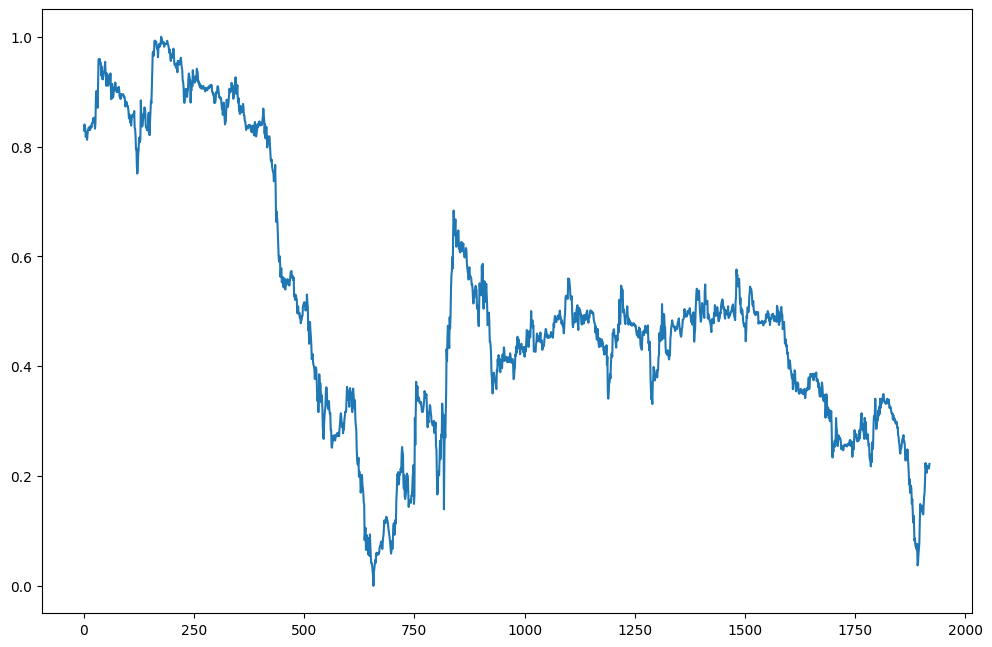

In [17]:
plt.plot(df.index, df['close'])

In [227]:
dataPointPerHour = 4
shift = dataPointPerHour * 8

In [228]:
dfTarget = df[['close']]
dfTarget.columns = ['target']
if shift > 0:
    dfTarget = dfTarget.tail(-shift)  # drop first n rows
    dfTarget = dfTarget.reset_index()
    dfTarget = dfTarget.drop(['index'], axis = 1)
dfTarget

,target
0,0.918243
1,0.958574
2,0.959512
3,0.950446
4,0.959356
...,...
1883,0.214319
1884,0.216820
1885,0.217915
1886,0.213694


In [229]:
dfInput = df
if shift > 0:
    dfInput = df.head(-shift) # drop last n rows
    dfInput = dfInput.reset_index()
    dfInput = dfInput.drop(['index'], axis = 1)
dfInput

,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,0.842797,0.845468,0.838515,0.829295,0.178965,0.042957,0.080702,0.107950,0.005314,0.109935,...,0.207382,0.837273,0.863177,0.945837,0.500000,0.361233,0.455607,0.448001,0.420153,0.838541
1,0.830283,0.836068,0.835647,0.840238,0.258797,0.063936,0.027193,0.000000,0.084145,0.077362,...,0.240821,0.838131,0.862299,0.944408,0.500000,0.365186,0.453635,0.500643,0.465159,0.839514
2,0.840920,0.842441,0.843646,0.835235,0.180672,0.035964,0.040351,0.060251,0.008857,0.066775,...,0.272507,0.838349,0.860872,0.942773,0.625000,0.368397,0.503611,0.439509,0.499354,0.839554
3,0.835445,0.831926,0.836100,0.831171,0.149685,0.004995,0.053509,0.026778,0.030115,0.053746,...,0.298928,0.838322,0.858975,0.941054,0.571430,0.370390,0.445222,0.507181,0.455940,0.838908
4,0.831378,0.827784,0.825989,0.817727,0.254596,0.004995,0.089474,0.076987,0.013286,0.087134,...,0.329081,0.837069,0.856584,0.939271,0.285715,0.369470,0.390251,0.541023,0.387500,0.836112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,0.115439,0.110722,0.148506,0.127872,0.344800,0.080919,0.012281,0.003347,0.080602,0.077362,...,0.701691,0.136378,0.192467,0.199258,0.000024,0.174935,0.114036,0.846902,0.168972,0.125270
1884,0.127327,0.117572,0.144884,0.110833,0.354123,0.047952,0.100000,0.130544,0.005314,0.131922,...,0.704567,0.128094,0.188025,0.197857,0.000012,0.163329,0.113764,0.884695,0.203359,0.116746
1885,0.110433,0.097021,0.116209,0.082070,0.408613,0.026973,0.171930,0.176569,0.010629,0.181596,...,0.711794,0.119184,0.182927,0.196142,0.000006,0.148531,0.111791,0.838604,0.157244,0.104880
1886,0.081495,0.078381,0.112436,0.086447,0.414785,0.094905,0.031579,0.055230,0.057573,0.106678,...,0.712257,0.109784,0.178169,0.194587,0.000003,0.134322,0.088854,0.870717,0.145291,0.095082


In [230]:
def windowed_df_to_date_X_y(df_input, df_target):
  middle_matrix = df_input.to_numpy()
  X = middle_matrix.reshape((len(df_input), middle_matrix.shape[1], 1))
  Y = df_target.to_numpy()

  return X.astype(np.float32), Y.astype(np.float32)

In [231]:
index = pd.DataFrame(df.index)
if shift > 0:
    index = index.head(-shift)

X, y = windowed_df_to_date_X_y(dfInput, dfTarget)

index.shape, X.shape, y.shape

((1888, 1), (1888, 86, 1), (1888, 1))

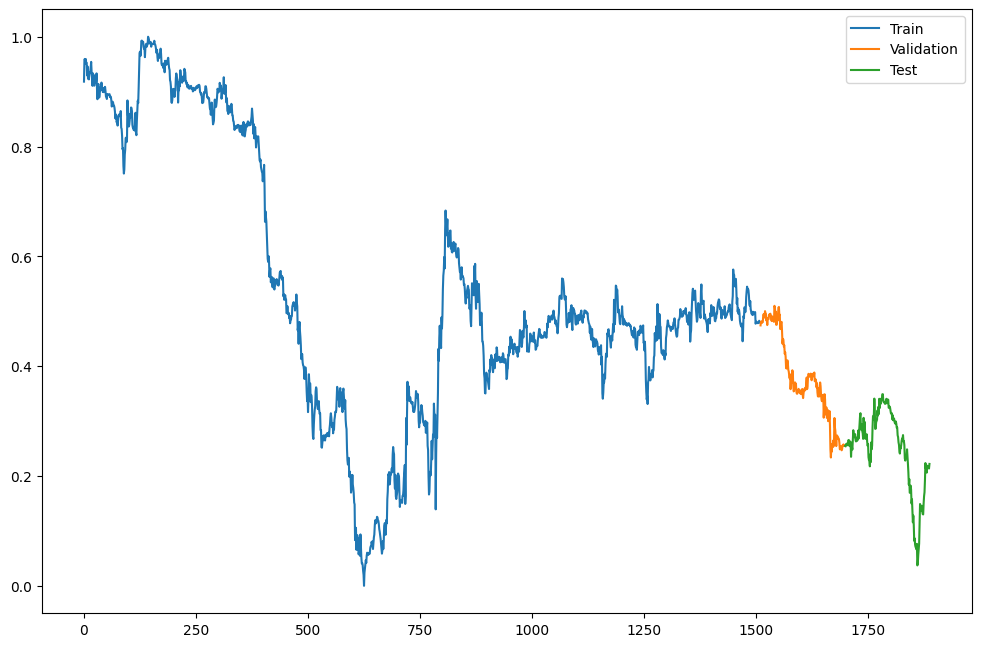

In [232]:
q_80 = int(len(index) * .8)
q_90 = int(len(index) * .9)

index_train, X_train, y_train = index[:q_80], X[:q_80], y[:q_80]
index_val, X_val, y_val       = index[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
index_test, X_test, y_test    = index[q_90:], X[q_90:], y[q_90:]

plt.plot(index_train, y_train)
plt.plot(index_val, y_val)
plt.plot(index_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [240]:
tf.random.set_seed(1)

model = tf.keras.models.Sequential([
                    tf.keras.layers.Input((X.shape[1], X.shape[2])),
                    tf.keras.layers.Bidirectional(
                        tf.keras.layers.LSTM(1024)
                    ),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(16, activation='relu'),
                    tf.keras.layers.Dropout(rate=0.2),
                    tf.keras.layers.Dense(1)])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min')

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_15 (Bidirecti  (None, 2048)             8404992   
 onal)                                                           
                                                                 
 dense_45 (Dense)            (None, 32)                65568     
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 8,471,105
Trainable params: 8,471,105
Non-trainable params: 0
___________________________________________

In [241]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000000, callbacks=[early_stopping])

Epoch 1/1000000
48/48 [==============================] - 4s 32ms/step - loss: 0.0729 - mean_absolute_error: 0.2021 - val_loss: 0.0070 - val_mean_absolute_error: 0.0729
Epoch 2/1000000
48/48 [==============================] - 1s 21ms/step - loss: 0.0285 - mean_absolute_error: 0.1304 - val_loss: 0.0056 - val_mean_absolute_error: 0.0642
Epoch 3/1000000
48/48 [==============================] - 1s 22ms/step - loss: 0.0257 - mean_absolute_error: 0.1236 - val_loss: 0.0062 - val_mean_absolute_error: 0.0654
Epoch 4/1000000
48/48 [==============================] - 1s 22ms/step - loss: 0.0226 - mean_absolute_error: 0.1178 - val_loss: 0.0031 - val_mean_absolute_error: 0.0467
Epoch 5/1000000
48/48 [==============================] - 1s 22ms/step - loss: 0.0216 - mean_absolute_error: 0.1137 - val_loss: 0.0051 - val_mean_absolute_error: 0.0582
Epoch 6/1000000
48/48 [==============================] - 1s 22ms/step - loss: 0.0210 - mean_absolute_error: 0.1110 - val_loss: 0.0045 - val_mean_absolute_error:

In [242]:
X_train, y_train

(array([[[0.8427968 ],
         [0.84546757],
         [0.8385149 ],
         ...,
         [0.44800133],
         [0.42015323],
         [0.83854085]],
 
        [[0.8302831 ],
         [0.8360682 ],
         [0.83564746],
         ...,
         [0.5006434 ],
         [0.46515897],
         [0.8395142 ]],
 
        [[0.84091973],
         [0.84244066],
         [0.8436462 ],
         ...,
         [0.4395093 ],
         [0.4993545 ],
         [0.83955383]],
 
        ...,
 
        [[0.50711715],
         [0.5021507 ],
         [0.5212798 ],
         ...,
         [0.51381415],
         [0.49649236],
         [0.4718933 ]],
 
        [[0.5058658 ],
         [0.5062928 ],
         [0.5138847 ],
         ...,
         [0.44718587],
         [0.49600944],
         [0.47491357]],
 
        [[0.49835756],
         [0.5126653 ],
         [0.51871413],
         ...,
         [0.38905242],
         [0.54913914],
         [0.47880483]]], dtype=float32),
 array([[0.91824293],
        [0.9585743

48/48 [==============================] - 1s 8ms/step
(1510, 1)
(1510,)
(1510, 1)
(1542, 1)
(1542,)
(1542,)


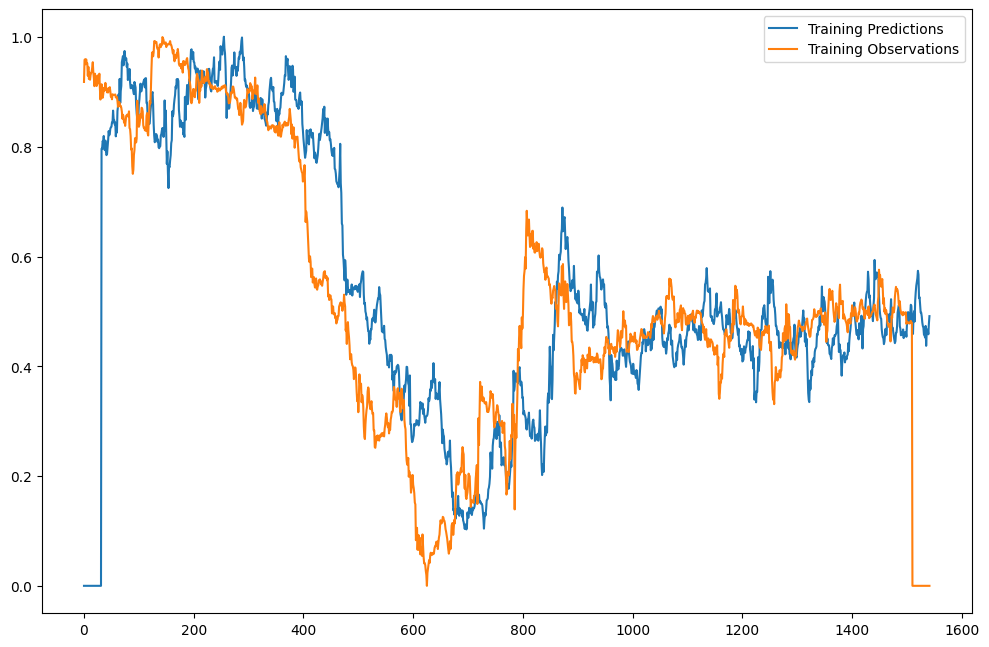

In [243]:
train_predictions = model.predict(X_train).flatten()

print(index_train.shape)
print(train_predictions.shape)
print(y_train.shape)

arr = np.empty((1, shift))
_train_predictions = np.append(arr, train_predictions)
_y_train = np.append(y_train, arr)
_index_train = index[:q_80+shift]
print(_index_train.shape)
print(_train_predictions.shape)
print(_y_train.shape)

plt.plot(_index_train, _train_predictions)
plt.plot(_index_train, _y_train)
plt.legend(['Training Predictions', 'Training Observations'])

6/6 [==============================] - 0s 8ms/step
(1510, 1)
(1510,)
(1510, 1)
(1542, 1)
(1542,)
(1542,)


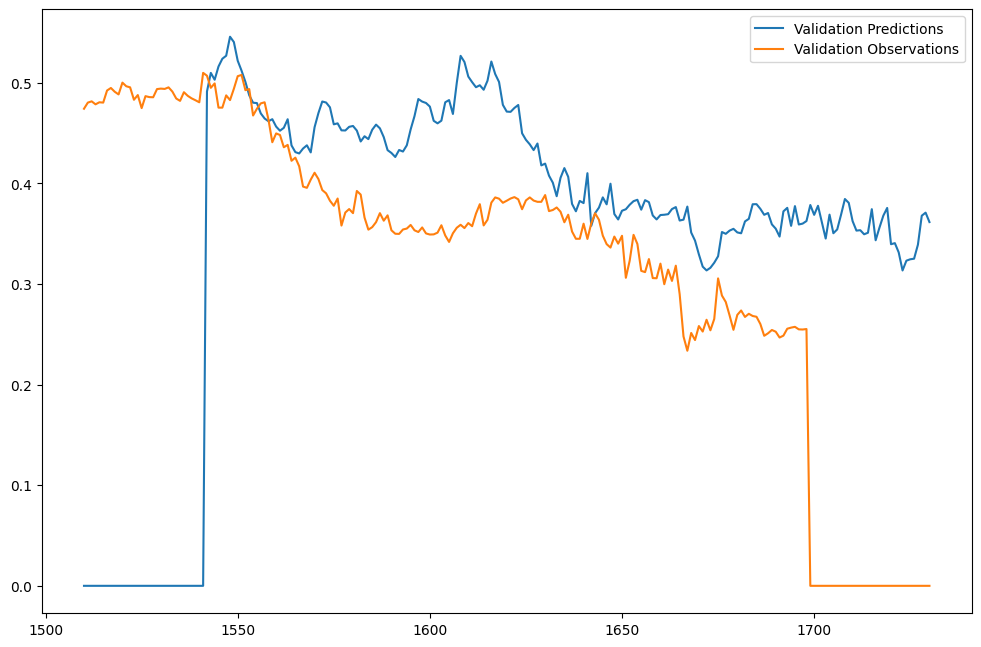

In [244]:
val_predictions = model.predict(X_val).flatten()

print(index_train.shape)
print(train_predictions.shape)
print(y_train.shape)

arr = np.empty((1, shift))
_val_predictions = np.append(arr, val_predictions)
_y_val = np.append(y_val, arr)
_index_val = index[q_80:q_90+shift]
print(_index_train.shape)
print(_train_predictions.shape)
print(_y_train.shape)

plt.plot(_index_val, _val_predictions)
plt.plot(_index_val, _y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

6/6 [==============================] - 0s 9ms/step
(189, 1)
(189,)
(189, 1)
(221, 1)
(221,)
(221,)


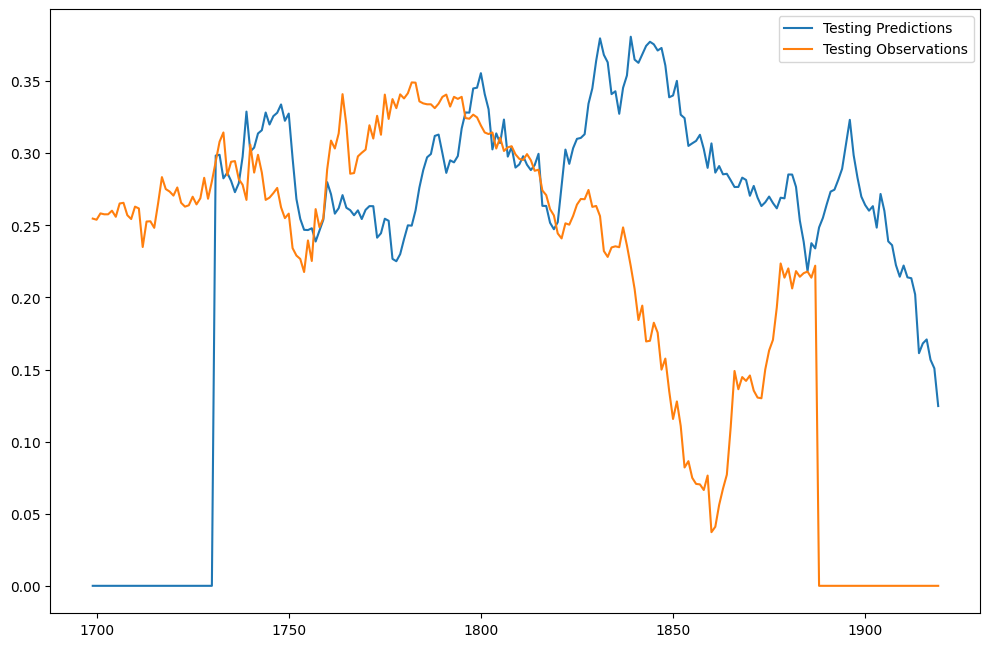

In [245]:
test_predictions = model.predict(X_test).flatten()

print(index_test.shape)
print(test_predictions.shape)
print(y_test.shape)

arr = np.empty((1, shift))
_test_predictions = np.append(arr, test_predictions)
_y_test = np.append(y_test, arr)

_index = index.copy()
for i in range(shift):
    df_new_line = pd.DataFrame([(_index[0].iloc[-1] + 1)], columns=[0])
    _index = pd.concat([_index, df_new_line], ignore_index=True)
    
_index_test = _index[q_90:]

print(_index_test.shape)
print(_test_predictions.shape)
print(_y_test.shape)

plt.plot(_index_test, _test_predictions)
plt.plot(_index_test, _y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

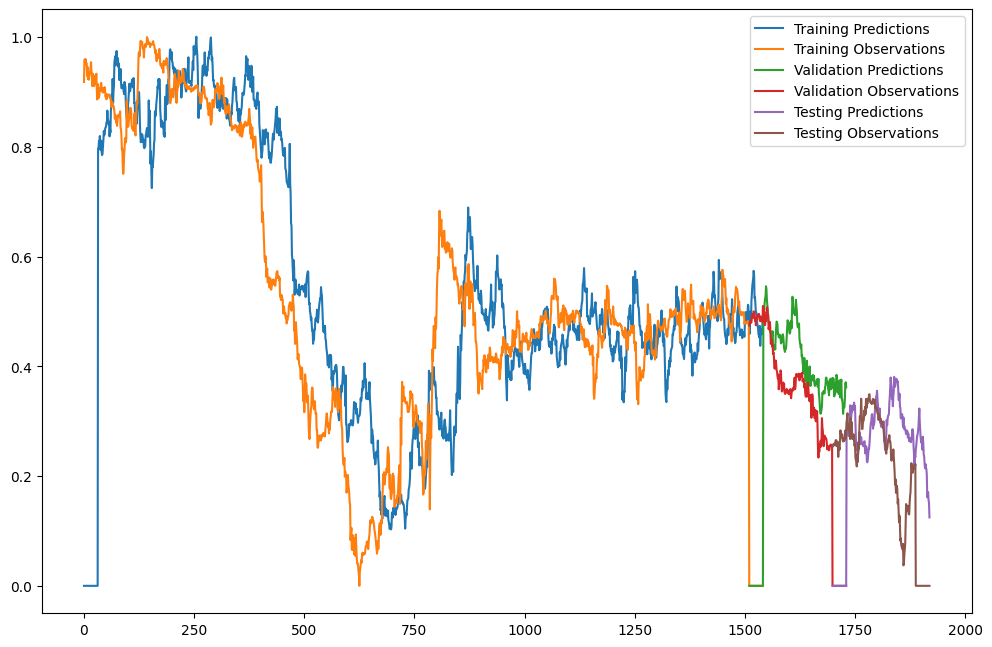

In [246]:
plt.plot(_index_train, _train_predictions)
plt.plot(_index_train, _y_train)
plt.plot(_index_val, _val_predictions)
plt.plot(_index_val, _y_val)
plt.plot(_index_test, _test_predictions)
plt.plot(_index_test, _y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])